In [1]:
# Libaries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import random
import seaborn

%matplotlib inline

# Resources
https://data.open-power-system-data.org/time_series/

The previous link provides the data in stacked form or single item

    AL / Albania
    AD / Andorra
    AM / Armenia
    AT / Austria (also sometimes OE in German-speaking countries: for "Oesterreich"
    BY / Belarus
    BE / Belgium
    BA / Bosnia and Herzegovina
    BG / Bulgaria
    CH / Switzerland (from Confoederatio Helvetica)
    CY / Cyprus
    CZ / Czech Republic
    DE / Germany
    DK / Denmark
    EE / Estonia
    ES / Spain
    FO / Faeroe Islands
    FI / Finland
    FR / France
    GB / United Kingdom (of Great Britain and Northern Ireland)
    GE / Georgia
    GI / Gibraltar
    GR / Greece
    HU / Hungary
    HR / Croatia (local name: Hrvatska)
    IE / Ireland
    IS / Iceland
    IT / Italy
    LT / Lithuania
    LU / Luxembourg
    LV / Latvia
    MC / Monaco
    MK / Macedonia
    MT / Malta
    NO / Norway
    NL / Netherlands
    PO / Poland
    PT / Portugal
    RO / Romania
    RU / Russian Federation
    SE / Sweden
    SI / Slovenia
    SK / Slovakia (Slovakian Republic)
    SM / San Marino
    TR / Turkey
    UA / Ukraine
    VA / Vatican City State


In [2]:
# Read in the stacked data
dataset_stacked = pd.read_csv('time_series_60min_stacked.csv')
dataset_stacked.shape
dataset_stacked.head()

/home/badmin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,region,variable,attribute,utc_timestamp,data
0,AL,load,entsoe_power_statistics,2016-12-31T23:00:00Z,1000
1,AL,load,entsoe_power_statistics,2017-01-01T00:00:00Z,830
2,AL,load,entsoe_power_statistics,2017-01-01T01:00:00Z,700
3,AL,load,entsoe_power_statistics,2017-01-01T02:00:00Z,610
4,AL,load,entsoe_power_statistics,2017-01-01T03:00:00Z,580


In [5]:
# Exploratory analysis
# Group by region to find most suitable regions
df_stack_region = dataset_stacked.groupby('region')
df_stack_region.head()

,region,variable,attribute,utc_timestamp,data
0,AL,load,entsoe_power_statistics,2016-12-31T23:00:00Z,1000
1,AL,load,entsoe_power_statistics,2017-01-01T00:00:00Z,830
2,AL,load,entsoe_power_statistics,2017-01-01T01:00:00Z,700
3,AL,load,entsoe_power_statistics,2017-01-01T02:00:00Z,610
4,AL,load,entsoe_power_statistics,2017-01-01T03:00:00Z,580
8016,AT,load,entsoe_power_statistics,2005-12-31T23:00:00Z,6297
8017,AT,load,entsoe_power_statistics,2006-01-01T00:00:00Z,6005
8018,AT,load,entsoe_power_statistics,2006-01-01T01:00:00Z,5743
8019,AT,load,entsoe_power_statistics,2006-01-01T02:00:00Z,5397
8020,AT,load,entsoe_power_statistics,2006-01-01T03:00:00Z,5213


In [6]:
# Coutn NA terms
dataset_stacked.isna().sum()

region              0
variable         3189
attribute        3189
utc_timestamp       0
data                0
dtype: int64

# Single Item Data

In [3]:
# Read in the single item data
dataset_singleitem = pd.read_csv('time_series_60min_singleindex.csv')
dataset_singleitem.shape
dataset_singleitem.head()

/home/badmin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (216) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,utc_timestamp,cet_cest_timestamp,AL_load_entsoe_power_statistics,AT_load_entsoe_power_statistics,AT_load_entsoe_transparency,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BA_load_entsoe_power_statistics,BA_load_entsoe_transparency,BE_load_entsoe_power_statistics,...,SI_price_day_ahead,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_entsoe_power_statistics,SK_load_entsoe_transparency,SK_price_day_ahead,SK_solar_generation_actual,TR_load_entsoe_power_statistics,UA_west_load_entsoe_power_statistics,interpolated_values
0,2005-12-31T23:00:00Z,2006-01-01T00:00:00+0100,NaN,6297.0,NaN,NaN,NaN,1425.0,NaN,9829.0,...,NaN,NaN,NaN,3332.0,NaN,NaN,NaN,NaN,719.0,NaN
1,2006-01-01T00:00:00Z,2006-01-01T01:00:00+0100,NaN,6005.0,NaN,NaN,NaN,1358.0,NaN,9447.0,...,NaN,NaN,NaN,3165.0,NaN,NaN,NaN,NaN,695.0,NaN
2,2006-01-01T01:00:00Z,2006-01-01T02:00:00+0100,NaN,5743.0,NaN,NaN,NaN,1283.0,NaN,9062.0,...,NaN,NaN,NaN,3040.0,NaN,NaN,NaN,NaN,654.0,NaN
3,2006-01-01T02:00:00Z,2006-01-01T03:00:00+0100,NaN,5397.0,NaN,NaN,NaN,1175.0,NaN,8589.0,...,NaN,NaN,NaN,3021.0,NaN,NaN,NaN,NaN,644.0,NaN
4,2006-01-01T03:00:00Z,2006-01-01T04:00:00+0100,NaN,5213.0,NaN,NaN,NaN,1134.0,NaN,8247.0,...,NaN,NaN,NaN,2959.0,NaN,NaN,NaN,NaN,638.0,NaN


In [11]:
num_rows = dataset_singleitem.shape[0]
dataset_singleitem.isna().sum()/num_rows

utc_timestamp                           0.000000
cet_cest_timestamp                      0.000000
AL_load_entsoe_power_statistics         0.926335
AT_load_entsoe_power_statistics         0.033313
AT_load_entsoe_transparency             0.718344
AT_solar_generation_actual              0.724960
AT_wind_onshore_generation_actual       0.322229
BA_load_entsoe_power_statistics         0.013472
BA_load_entsoe_transparency             0.899115
BE_load_entsoe_power_statistics         0.013472
BE_load_entsoe_transparency             0.719970
BE_price_day_ahead                      0.726063
BE_solar_generation_actual              0.719143
BE_wind_offshore_generation_actual      0.725797
BE_wind_onshore_generation_actual       0.719621
BG_load_entsoe_power_statistics         0.006856
BG_load_entsoe_transparency             0.725291
BG_price_day_ahead                      0.876251
BG_solar_generation_actual              0.726568
BG_wind_onshore_generation_actual       0.726293
CH_load_entsoe_power

In [15]:
print(dataset_singleitem.shape)
df_si = dataset_singleitem.dropna(axis=1)
df_si.head()

(108817, 217)


,utc_timestamp,cet_cest_timestamp,DE_price_day_ahead,DE_50hertz_wind_generation_forecast,DK_1_price_day_ahead,DK_1_wind_generation_actual,DK_2_price_day_ahead,DK_2_wind_generation_actual,NO_price_day_ahead
0,2005-12-31T23:00:00Z,2006-01-01T00:00:00+0100,32.10,1366.0,33.88,207.1,33.88,52.0,33.88
1,2006-01-01T00:00:00Z,2006-01-01T01:00:00+0100,30.07,1306.0,33.43,214.6,33.43,58.4,33.43
2,2006-01-01T01:00:00Z,2006-01-01T02:00:00+0100,27.94,1245.0,32.10,202.1,32.10,57.9,33.25
3,2006-01-01T02:00:00Z,2006-01-01T03:00:00+0100,21.71,1196.0,18.61,214.0,29.56,79.6,33.12
4,2006-01-01T03:00:00Z,2006-01-01T04:00:00+0100,8.24,1058.0,2.97,223.1,29.10,96.1,32.85


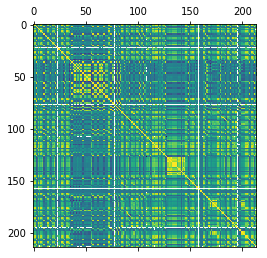

In [16]:
plt.matshow(dataset_singleitem.corr())